In [1]:
import MeCab

In [2]:
tagger = MeCab.Tagger('')

In [3]:
def  parse_neko():
    with open("./neko.txt") as file:
        Text = file.read()
    with open("./neko.txt.mecab","w") as file2:
        file2.write(tagger.parse(Text))

In [4]:
parse_neko()

In [5]:
! head -n 10  neko.txt.mecab

一	名詞,数,*,*,*,*,一,イチ,イチ
　	記号,空白,*,*,*,*,　,　,　
吾輩	名詞,代名詞,一般,*,*,*,吾輩,ワガハイ,ワガハイ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
猫	名詞,一般,*,*,*,*,猫,ネコ,ネコ
で	助動詞,*,*,*,特殊・ダ,連用形,だ,デ,デ
ある	助動詞,*,*,*,五段・ラ行アル,基本形,ある,アル,アル
。	記号,句点,*,*,*,*,。,。,。
名前	名詞,一般,*,*,*,*,名前,ナマエ,ナマエ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ


# 30 形態素解析結果の読み込み

表層形\t品詞,品詞細分類1,品詞細分類2,品詞細分類3,活用型,活用形,原形,読み,発音

In [6]:
def neko_lines():
    '''
    一文づつ形態素のリストを返す
    '''
    with open("./neko.txt.mecab") as file:
        morphemes=[]
        for line in file:
            cols = line.split('\t')
            if(len(cols)<2):
                return
            res_cols = cols[1].split(',')
        
            morpheme={
                'surface':cols[0],
                'base':res_cols[6],
                'pos':res_cols[0],
                'pos1':res_cols[1]
            }
            morphemes.append(morpheme)
        
            if res_cols[1]=="句点":
                #一文づつ区切る。だから、句点が来たらyield
                yield morphemes
                morphemes=[]
            

In [7]:
parse_neko()
lines=neko_lines()

In [8]:
for i,l in enumerate(lines):
    if i<3:
        print(l)
        print("\n\n")
    else:
        break

[{'surface': '一', 'base': '一', 'pos': '名詞', 'pos1': '数'}, {'surface': '\u3000', 'base': '\u3000', 'pos': '記号', 'pos1': '空白'}, {'surface': '吾輩', 'base': '吾輩', 'pos': '名詞', 'pos1': '代名詞'}, {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'}, {'surface': '猫', 'base': '猫', 'pos': '名詞', 'pos1': '一般'}, {'surface': 'で', 'base': 'だ', 'pos': '助動詞', 'pos1': '*'}, {'surface': 'ある', 'base': 'ある', 'pos': '助動詞', 'pos1': '*'}, {'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'}]



[{'surface': '名前', 'base': '名前', 'pos': '名詞', 'pos1': '一般'}, {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'}, {'surface': 'まだ', 'base': 'まだ', 'pos': '副詞', 'pos1': '助詞類接続'}, {'surface': '無い', 'base': '無い', 'pos': '形容詞', 'pos1': '自立'}, {'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'}]



[{'surface': '\u3000', 'base': '\u3000', 'pos': '記号', 'pos1': '空白'}, {'surface': 'どこ', 'base': 'どこ', 'pos': '名詞', 'pos1': '代名詞'}, {'surface': 'で', 'base': 'で', 'pos': '助詞', 'pos1': '格助詞'}, {'surface': '生れ', 'base

# 31 動詞の表層系

In [9]:
verbs=set()

In [10]:
for line in neko_lines(): #line->一文
    for morpheme in line: #morpheme 形態素ごと 
        if morpheme['pos']=='動詞':
            verbs.add(morpheme['surface'])

In [11]:
verbs

{'落ちつか',
 'やむをえ',
 '拡げ',
 '侵し',
 '待たさ',
 '習お',
 '飛び込め',
 'あるか',
 '申し合せ',
 'こじ開ける',
 '言い兼ね',
 '払い',
 '脱する',
 '間に合っ',
 '飛びつい',
 '口走る',
 '明かし',
 '張れ',
 '立ち上がる',
 '当て',
 '傾け',
 '及ぼし',
 '光ら',
 '教える',
 '罵り',
 'むい',
 '舂き',
 '映り',
 'つぐ',
 '拭き込ん',
 '消える',
 '開け',
 'めで',
 '噛ん',
 '癒す',
 'もらわ',
 'おくっ',
 '引っ込ま',
 '踏む',
 'いただき',
 'すき',
 '分る',
 '擦り',
 '振り落とそ',
 '捉え',
 '渋り',
 'かかり',
 '降り',
 'つけ込ん',
 '擲つ',
 '得よ',
 '平らげ',
 'むき出し',
 '出し',
 '剥げる',
 '通り掛っ',
 '遂げ',
 '売り捌い',
 '奮っ',
 '込める',
 '腐っ',
 '廻',
 'はずれ',
 'し',
 '授ける',
 '溜まっ',
 'あれ',
 'なさっ',
 '間違っ',
 '下す',
 '踊り',
 '割る',
 '連れ出し',
 '追え',
 '祝し',
 '聞け',
 '断わり',
 '終え',
 'いたす',
 'うなら',
 'ちょろまかし',
 '優る',
 '繙け',
 '据え付け',
 'おろし',
 '話せ',
 '寄こし',
 '来る',
 '謹ん',
 '充ち',
 '違う',
 '塗り',
 'ぬう',
 '入り乱れ',
 '曲がろ',
 'かため',
 '評し',
 '書こ',
 'やれん',
 '廻り',
 '滑べっ',
 'てりゃ',
 '生き延び',
 'ごまかし',
 '吹か',
 '推す',
 'ける',
 'いらっしゃい',
 'てっ',
 '恐',
 '擦り付け',
 '見て取っ',
 '圧し',
 '引け',
 '聞き返す',
 '借',
 'くだけ',
 'もうし',
 'なりすまし',
 '捩じ',
 'がたつく',
 'あばれ',
 '告げん',
 '沿う',
 '舞い戻っ',
 '打ち立て',
 '留っ',
 '明か',
 '出れ'

# 32 動詞の原形

In [12]:
base = set()

In [13]:
for line in neko_lines():
    for morpheme in line:
        if morpheme['pos'] =="動詞":
            base.add(morpheme['base'])

In [14]:
base

{'狂う',
 '躍り込む',
 'こじ開ける',
 '脱する',
 '退る',
 '口走る',
 'かれる',
 '立ち上がる',
 '泊る',
 '遊ばす',
 '教える',
 '思い立つ',
 'こうる',
 'つぐ',
 '数え切れる',
 'つつむ',
 '奪う',
 '明ける',
 '消える',
 '残す',
 '癒す',
 'ひそめる',
 '似る',
 '産まれる',
 '反る',
 '捏ねる',
 '踏む',
 'もたす',
 '分る',
 '呼びつける',
 '浮かれる',
 '擲つ',
 '剥げる',
 '込める',
 'すくう',
 '授ける',
 'おどす',
 'くばる',
 '写す',
 '下す',
 '飲める',
 '割る',
 '悟れる',
 'はおる',
 '平らげる',
 'あきれる',
 'いいかえる',
 'いたす',
 '吊る',
 '優る',
 '届ける',
 '抱える',
 '取り扱う',
 '来る',
 '沁みる',
 '見識張る',
 '違う',
 '研ぐ',
 'ぬう',
 '借る',
 '容れる',
 '打ち立てる',
 '来たす',
 'いむ',
 '砕く',
 '追い込む',
 '察する',
 '推す',
 '儲かる',
 'ける',
 'ひっくり返す',
 '聞き返す',
 'がたつく',
 '沿う',
 'がる',
 '択ぶ',
 '養う',
 '湧き出る',
 '綯う',
 'できる',
 '廻る',
 '在る',
 'つる',
 '映ずる',
 '割り切れる',
 '腐る',
 '干す',
 '見渡す',
 '騒ぎ立てる',
 '言いつける',
 '述べる',
 '悲しむ',
 '爛れる',
 '引き立つ',
 'おどかす',
 'かわす',
 'ほかなる',
 '聳える',
 '焼ける',
 '催す',
 '捕える',
 '被る',
 '直す',
 'うかがう',
 '焦れる',
 'うなる',
 '亡ぼす',
 '言い兼ねる',
 '肥る',
 '怒鳴る',
 '抜き取る',
 'すべる',
 '印す',
 '押し寄せる',
 'やむ',
 '伺える',
 '飲み込める',
 '印せる',
 '限る',
 '組み合せる',
 'ひねる',
 '坐る',
 '争う',
 'あきれ返る',
 'すす

# 33 サ変名詞

サ変名詞
* [名詞]する　の形の動詞

In [15]:
sahen = set()

In [16]:
for line in neko_lines():
    for morpheme in line:
        if morpheme['pos']=='名詞' and morpheme['pos1']=='サ変接続':
            sahen.add(morpheme['surface'])
        

In [17]:
sahen

{'比例',
 '支度',
 '横行',
 '練習',
 '連続',
 '頓着',
 '要心',
 '追窮',
 '評論',
 '分別',
 '尾行',
 '失敬',
 '免職',
 '忠告',
 '応用',
 'だかん',
 '統監',
 '戦争',
 "'",
 '予期',
 '安置',
 '注目',
 '推知',
 '退却',
 '捕捉',
 '露見',
 '驚嘆',
 '奮発',
 '商売',
 '身動き',
 '解',
 '胡坐',
 '屹立',
 '署名',
 '調和',
 '訓練',
 '祈念',
 '叙',
 '演説',
 '位置',
 '着付け',
 '脱',
 '主張',
 '専断',
 '寄附',
 '心痛',
 '廃業',
 '相違',
 '返事',
 '伝聞',
 '談判',
 '裁縫',
 'かさん',
 '処',
 '証明',
 '分与',
 '中絶',
 '奨励',
 '懺悔',
 '名状',
 '評',
 '味方',
 '志望',
 '換言',
 '入会',
 '邪魔',
 '彩色',
 '怪我',
 '待った',
 '大騒ぎ',
 '創作',
 '密猟',
 '逃亡',
 '婚姻',
 '贔屓',
 '志願',
 '参堂',
 '放歌',
 '答弁',
 '赤面',
 '思惟',
 '晴れ晴れ',
 '充満',
 '服薬',
 '恐怖',
 '散会',
 '合奏',
 '屈従',
 '(',
 '論及',
 '捏造',
 '監督',
 '成功',
 '抹殺',
 '成立',
 '矛盾',
 '来訪',
 '承認',
 '借金',
 '真似',
 '再来',
 '消沈',
 '寸断',
 '応対',
 '献上',
 '列挙',
 '威圧',
 '蒸発',
 '敬',
 'せわ',
 '自覚',
 '見物',
 '剿滅',
 '焦慮',
 '述懐',
 '留守',
 '乾燥',
 '長生',
 '包含',
 '披露',
 '承知',
 '沈澱',
 '暴露',
 '存',
 '吹聴',
 '成仏',
 '制限',
 '恐く',
 '托',
 '歩行',
 '療治',
 '成就',
 '軟化',
 '摩擦',
 '返報',
 '賭',
 '意味',
 '在宿',
 '勉強',
 '診断',
 '沈黙',
 '晴々',
 '督',
 '劇

# 33 AのB

In [18]:
no_rensetu=set()

In [19]:
for line in neko_lines():
    for prev,cur,nex in zip(line,line[1:],line[2:]):
        if prev['pos']=='名詞' and cur['surface']=="の"\
            and nex['pos']=='名詞':
            no_rensetu.add(prev['surface']+cur['surface']+nex['surface'])

In [20]:
no_rensetu

{'君のよう',
 'おやじの前',
 '黒柿の縁',
 '三の問答',
 '行のよう',
 '金田の倉',
 '売れ残りの旗本',
 '顔の権衡',
 '書物の上',
 '活気の使い道',
 '迷亭の食い気',
 '今日の語り物',
 '鼻の発達',
 '上の問題',
 '自己の力量',
 '自分の体',
 '御国のため',
 '子の鼻',
 '先生の居',
 '土手の上',
 '自分の勝手',
 '類似の事',
 '撫肩の恰好',
 '横の筋',
 'つんつるてんの乱暴',
 '私の宿',
 '塩焼の頭',
 '人間の心',
 '君子の挙動',
 '世紀の人間',
 '窮措大の家',
 '三の端書',
 '画の未練',
 '主人の家',
 '叙述の順序',
 '彼のあばた',
 '浄瑠璃の近松',
 '築山の陰',
 '大学の教師',
 '軍隊の凱旋',
 '人間の糟',
 '論文の問題',
 'ぐたぐたの感',
 '承知の上',
 '二の問題',
 '眼の上',
 '細君のため',
 '上の作用',
 '時機の一',
 '人の構',
 '風の積極',
 '身の危険',
 '個の孔',
 '彼の悟り',
 'ほかの事',
 '五の若い衆',
 '平面の上',
 '人生の目的',
 '金田の内幕',
 '遥かの下界',
 '毛の根本',
 '後架の中',
 '餅の魔',
 '遠くの方',
 '主人の頭',
 '彼の眉目',
 '唯一の言語',
 '夜具のなか',
 '口のなか',
 '不器量の吾輩',
 '冊の内',
 '人間の眼',
 '小生の都合',
 '大兄の為',
 '逆上の天才',
 '裸のまま',
 'こちらの刃',
 '彼等の変化',
 'どこの何者',
 '向うの下宿',
 '先生の臥竜',
 '線の株',
 '蠅の眼',
 '横丁の鼻',
 '主人の身の上',
 '種の装飾',
 '館の教師',
 'こいつの方',
 '私の妻',
 '文金の高島田',
 '風呂敷のよう',
 '顔の平面',
 '紫色の袴',
 '個性の発展',
 '彼の首',
 '客の名前',
 '勉強の邪魔',
 '例の赤本',
 '浮世の風',
 '箸の根元',
 '呑舟の魚',
 '琵琶のだき',
 '人情の変遷',
 '個性の自由',
 '演説の首脳',
 '台所の雨戸

# 34 名詞の連接

最長一致
* できるだけ長い列

In [21]:
rensetu=set()

In [22]:
for line in neko_lines():
    tmp=""
    for morpheme in line:
        if morpheme['pos']=="名詞":
            tmp+=morpheme['surface']
        else:
            if tmp:
                rensetu.add(tmp)
                tmp=''
if tmp!='':
    rensetu.add(tmp)

In [23]:
 rensetu

{'分界線',
 '状体',
 'ろう',
 '支度',
 'いたずらもの',
 '山高帽子',
 '不用心',
 '澱粉',
 '灯心入り',
 '甘木医学士',
 '太古',
 'こん畜生',
 '援兵',
 '○子さん',
 '賤老若',
 '胡坐',
 '小人',
 '悄然',
 '——彼等希臘人',
 '咽',
 '以心伝心',
 '心痛',
 '意',
 '返事',
 '径路',
 '他',
 '糟',
 '談判',
 '威力',
 'おのれ',
 '一足',
 'いただき',
 '禿',
 '他人',
 '形式的',
 '穏',
 '女人一流',
 'ナッシ',
 '慾気',
 '壱円五十銭',
 '穀潰し',
 '宗谷海峡',
 'ゃなれないじゃないか',
 '幾何学的',
 '候次第',
 '亀',
 '夕べ何時',
 '踏張',
 '下',
 '自国',
 'ひと度',
 '祝捷会',
 '金田家',
 '胃病患者',
 '方法',
 '一つ二つ',
 'ご免',
 '俳句会',
 '近来大分聞',
 '附近',
 '通り寒月君',
 '前夜',
 '蒸発',
 '例',
 '定規',
 '左',
 '見物',
 '古雅',
 '師匠さん',
 '童子',
 '根拠地',
 'ヘクトー',
 '壊わし',
 '毎日毎日',
 '沢山',
 '包含',
 '陣立ていかん',
 '死',
 '両替町',
 '一つここ',
 'もさ',
 '吹聴',
 '七日間',
 'ぎ',
 '見込み',
 '成就',
 'んざどうだって',
 '顔全体',
 '飯茶椀',
 '錬金術以前',
 '先生例',
 '劇変',
 'ごまかし',
 '春夏秋冬一枚看板',
 '胸',
 '膳椀皿小鉢',
 '禅',
 '御前の',
 '陰',
 '大変珍重',
 '赤松',
 '肉食論者',
 '圧し',
 '寸分',
 '穏かな日',
 '警戒',
 '恩',
 '状況',
 '背中',
 '淡泊',
 '二日',
 '青空',
 '憚り様',
 '身の丈',
 '世話物',
 '日藤さん',
 '一大凱旋祝賀会',
 '独り',
 '逸事',
 '大当り',
 '胸中',
 '帆',
 '泊り',
 '細帯',
 '戦闘',
 '嘘',
 '返答次第',
 'みんな

# 35 単語の出現頻度

In [24]:
from collections import Counter

In [25]:
L=[]
for line in neko_lines():
    L.extend([morpheme['base'] for morpheme in line])

In [26]:
C=Counter(L)

In [27]:
C.most_common()

[('の', 9194),
 ('。', 7486),
 ('て', 6853),
 ('、', 6772),
 ('は', 6422),
 ('に', 6268),
 ('を', 6071),
 ('だ', 5978),
 ('と', 5515),
 ('が', 5339),
 ('た', 4270),
 ('する', 3669),
 ('「', 3231),
 ('」', 3225),
 ('ない', 3054),
 ('も', 2479),
 ('ある', 2322),
 ('*\n', 2191),
 ('で', 2090),
 ('から', 2042),
 ('いる', 1778),
 ('ん', 1568),
 ('か', 1530),
 ('云う', 1408),
 ('事', 1207),
 ('です', 1164),
 ('ます', 1146),
 ('なる', 1121),
 ('へ', 1034),
 ('う', 987),
 ('もの', 981),
 ('君', 973),
 ('主人', 932),
 ('ぬ', 719),
 ('よう', 697),
 ('見る', 675),
 ('ね', 657),
 ('この', 649),
 ('御', 636),
 ('ば', 617),
 ('人', 602),
 ('その', 576),
 ('一', 554),
 ('そう', 554),
 ('何', 539),
 ('思う', 502),
 ('よ', 502),
 ('吾輩', 481),
 ('来る', 460),
 ('れる', 450),
 ('じゃ', 450),
 ('…', 433),
 ('これ', 414),
 ('\u3000', 411),
 ('さ', 409),
 ('それ', 395),
 ('聞く', 347),
 ('でも', 345),
 ('時', 344),
 ('行く', 340),
 ('出来る', 324),
 ('出る', 317),
 ('ところ', 315),
 ('な', 314),
 ('まで', 313),
 ('方', 312),
 ('やる', 311),
 ('三', 311),
 ('二', 302),
 ('上', 294),
 ('いい', 294),
 ('寒月',

# 36 頻度上位10

In [28]:
import matplotlib.pyplot as plt

In [29]:
#日本語用
import matplotlib.font_manager as fm
import matplotlib as mpl
mpl.rcParams['font.family']='AppleGothic'

In [30]:
top10 =  C.most_common(10)

In [31]:
X=[]
Y=[]
for x,y in top10:
    X.append(x)
    Y.append(y)

Text(0.5,1,'word frequency top10')

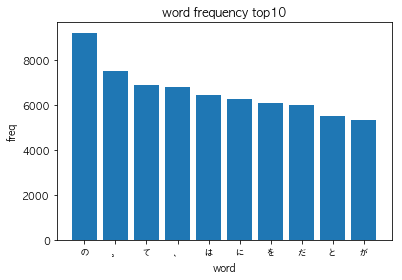

In [32]:
plt.bar(X,Y)
plt.xlabel('word')
plt.ylabel('freq')
plt.title("word frequency top10")

# 37 猫と共起頻度の高い上位10語

共起:
* ここでは、同じ文中に共に出現とする
*　同じ文中に複数出てくる語は、一文で一回とカウントする

In [33]:
co_occur=[]
for line in neko_lines():
    if any(morpheme['surface']=="猫" for morpheme in line):
        co_occur.extend(list(set([morpheme['base'] for morpheme in line])))

In [34]:
neko_counter = Counter(co_occur)

In [35]:
word=[]
freq=[]
for w,v in neko_counter.most_common(20):
    word.append(w)
    freq.append(v)

In [36]:
word

['猫',
 '。',
 'の',
 'は',
 'だ',
 'を',
 'て',
 'に',
 'と',
 '、',
 'が',
 'する',
 'ある',
 'ない',
 'た',
 'も',
 'で',
 '吾輩',
 'から',
 'いる']

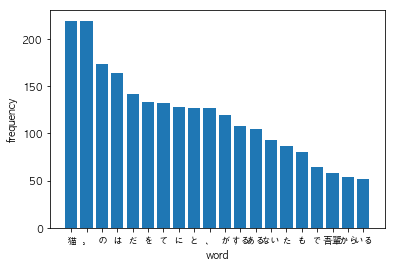

In [37]:
plt.bar(word,freq)
plt.xlabel('word')
plt.ylabel('frequency')
plt.show()

# 38 ヒストグラム

In [38]:
freq=[val for word,val in C.most_common()]
order=range(1,len(freq)+1)

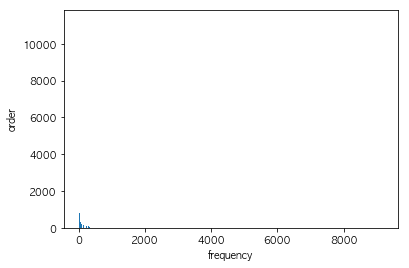

In [39]:
plt.bar(freq,order)
plt.xlabel('frequency')
plt.ylabel('order')
plt.show()

# 39 Zipfの法則

ジップの法則（ジップのほうそく、Zipf's law）あるいはジフの法則とは、出現頻度が k 番目に大きい要素が全体に占める割合が 
1/k  
 に比例するという経験則である。Zipf は「ジフ」と読まれることもある。また、この法則が機能する世界を「ジフ構造」と記する論者もいる。

In [40]:
freq=[val for word,val in C.most_common()]
order=range(1,len(freq)+1)

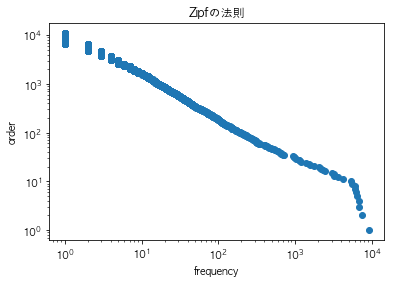

In [41]:
plt.scatter(freq,order)
plt.title("Zipfの法則")
plt.xlabel('frequency')
plt.ylabel('order')
plt.yscale('log')
plt.xscale('log')